In [53]:
import re
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import math

# Create an empty list to store words with repeating letters

def get_words_with_repeated_letters(file_name, text_column):
    df = pd.read_csv(file_name)
    words_with_repeating_letters = []
    # Loop through each row in the DataFrame
    for index, row in df.iterrows():
        # Loop through each word in the sentence
        for word in row[text_column].split():
            # Check if the word contains repeating letters
            if re.search(r'(\w)\1{2,}', word):
                # Add the word to the list
                words_with_repeating_letters.append(word)

 # filtered_sentence = re.sub(r'[^a-zA-Z\s]', '', no_emojis)
        # print(filtered_sentence)
        # text = text.decode()
        # filtered_sentence = re.sub(r'\d+', '', text)
        # sentence = re.sub(r'[^\w\s]', '', re.sub(r'\d+', '', text))
        # print(text)

def show_word_cloud(dataset, text_column):
    repeating_words = []
    for text in dataset[text_column]:
        if not isinstance(text, str):
            continue
        # print(type(text))
        no_emojis = emoji.replace_emoji(text)
        filtered_sentence = re.sub(r'\d+', '', no_emojis)

        words = filtered_sentence.split()
        for word in words:
            if re.match(r'\b\w*(\w)\1{2,}\w*\b', word):
            # if re.search(r'(\w)\1{2,}', word):
                repeating_words.append(word)

    # combine repeating words into a single string
    text = ' '.join(repeating_words)

    # print(text)
    # generate word cloud
    wordcloud = WordCloud(width=1200, height=1200, background_color='white',
                          min_font_size=10).generate(text)
    # plot word cloud
    plt.figure(figsize=(12, 12), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [2]:
df = pd.read_table("Datasets/amazon_reviews_us_Apparel_v1_00.tsv/amazon_reviews_us_Apparel_v1_00.tsv", on_bad_lines='skip')

In [3]:

def contains_emoji(s):
    if isinstance(s, str):
        if(emoji.emoji_count(s) > 0):
            return True
        return False
        # for c in s:
        #     if c in emoji.UNICODE_EMOJI:
        #         return True
    return False

pattern = r'(\w)\1+'

def contains_emphasized_text(s):
    if isinstance(s, str):
        words = s.split()
        for word in words:
            if re.match(r'\b\w*(\w)\1{2,}\w*\b', word):
                return True
        return False
    return False


# Filter the dataframe to only include rows where the review contains emojis
# df_with_emojis = df[df['review_body'].apply(contains_emoji) == True]
df_with_filter = df[(df['review_body'].apply(contains_emoji) == True) | (df['review_body'].apply(contains_emphasized_text) == True)]

# Group the filtered dataframe by product ID and concatenate the reviews
# reviews_by_product = df_with_emojis.groupby('product_id')['review_body'].apply(lambda x: ' '.join(x))
# df_with_emojis.to_csv('reviews_with_emojis_amazon_apparel.csv')

In [7]:
# df_with_filter.to_csv("amazon_apparel_reviews_emoji_and_emphasized_text.csv")
df = df_with_filter

In [62]:
df = pd.read_csv("amazon_apparel_reviews_emoji_and_emphasized_text.csv")

repeating_words = []
for text in df['review_body']:
    if not isinstance(text, str):
        continue
    # print(type(text))
    no_emojis = emoji.replace_emoji(text)
    filtered_sentence = re.sub(r'\d+', '', no_emojis)
    # filtered_sentence = re.sub(r'[^a-zA-Z\s]', '', no_emojis)
    # print(filtered_sentence)
    # text = text.decode()
    # filtered_sentence = re.sub(r'\d+', '', text)
    # sentence = re.sub(r'[^\w\s]', '', re.sub(r'\d+', '', text))
    # print(text)
    words = filtered_sentence.split()
    for word in words:
        if re.match(r'\b\w*(\w)\1{2,}\w*\b', word):
            # if re.search(r'(\w)\1{2,}', word):
            repeating_words.append(word)

repeating_words


['XXXL',
 'waistttttttttttt',
 'worseeeeeeee.',
 'Nothingggggg.',
 'NOWWWW',
 'sooooo',
 'soooooo',
 'Waaaaaay',
 'soooo',
 'soooooooooooooooo',
 'waayyy',
 'soooooo',
 'XXX-L.',
 'ddd.',
 'Soooo',
 'sooo',
 'AAAHHH!',
 'Soooo',
 'soooo',
 'soooooo',
 'LOOOVE',
 'ddd',
 'XXXXL=XXL',
 'soooo',
 'DDD',
 'XXX',
 'xxx',
 'juuuust',
 'sooo',
 'WAAYYYY',
 'xxx',
 'Tooo',
 'soooo',
 'www.facebook.com/noflutter.',
 'xxx-larger',
 'soooo',
 'waaaaaay',
 'aaaaheaadd',
 'eeehhhhmmm.',
 'cuuuuute',
 'wayyy',
 'soooo',
 'wayyyy',
 'XXXL...',
 'whooo',
 'XXXL.',
 'noooo',
 'SEXYYY!!!',
 'XXXL.',
 'DDD',
 'ddd',
 'ummmmm',
 'ummmm',
 'wayyyyyy',
 'SEXXXXXXYYY',
 'WAYYY',
 'Wooow',
 'DDD',
 'BADDDDD',
 'Waaayyy',
 'xxxl',
 'XXXL.',
 'XXXXL,',
 'soooooo',
 'looooove',
 'WAAAAYYYYYYY',
 'BADDDDD',
 'Ehhh',
 'waaay',
 'TOooooooo',
 'SWeeeeeeettttttt',
 'Loooove',
 'HOOOOODINI',
 'Sooooo',
 'XXXL',
 'XXXL',
 'XXXL,',
 'XXXL,',
 'XXXL,',
 'wayyy',
 'sooo',
 'uppper',
 'mooooom',
 'soooo',
 'DDD',
 'OMGGG',

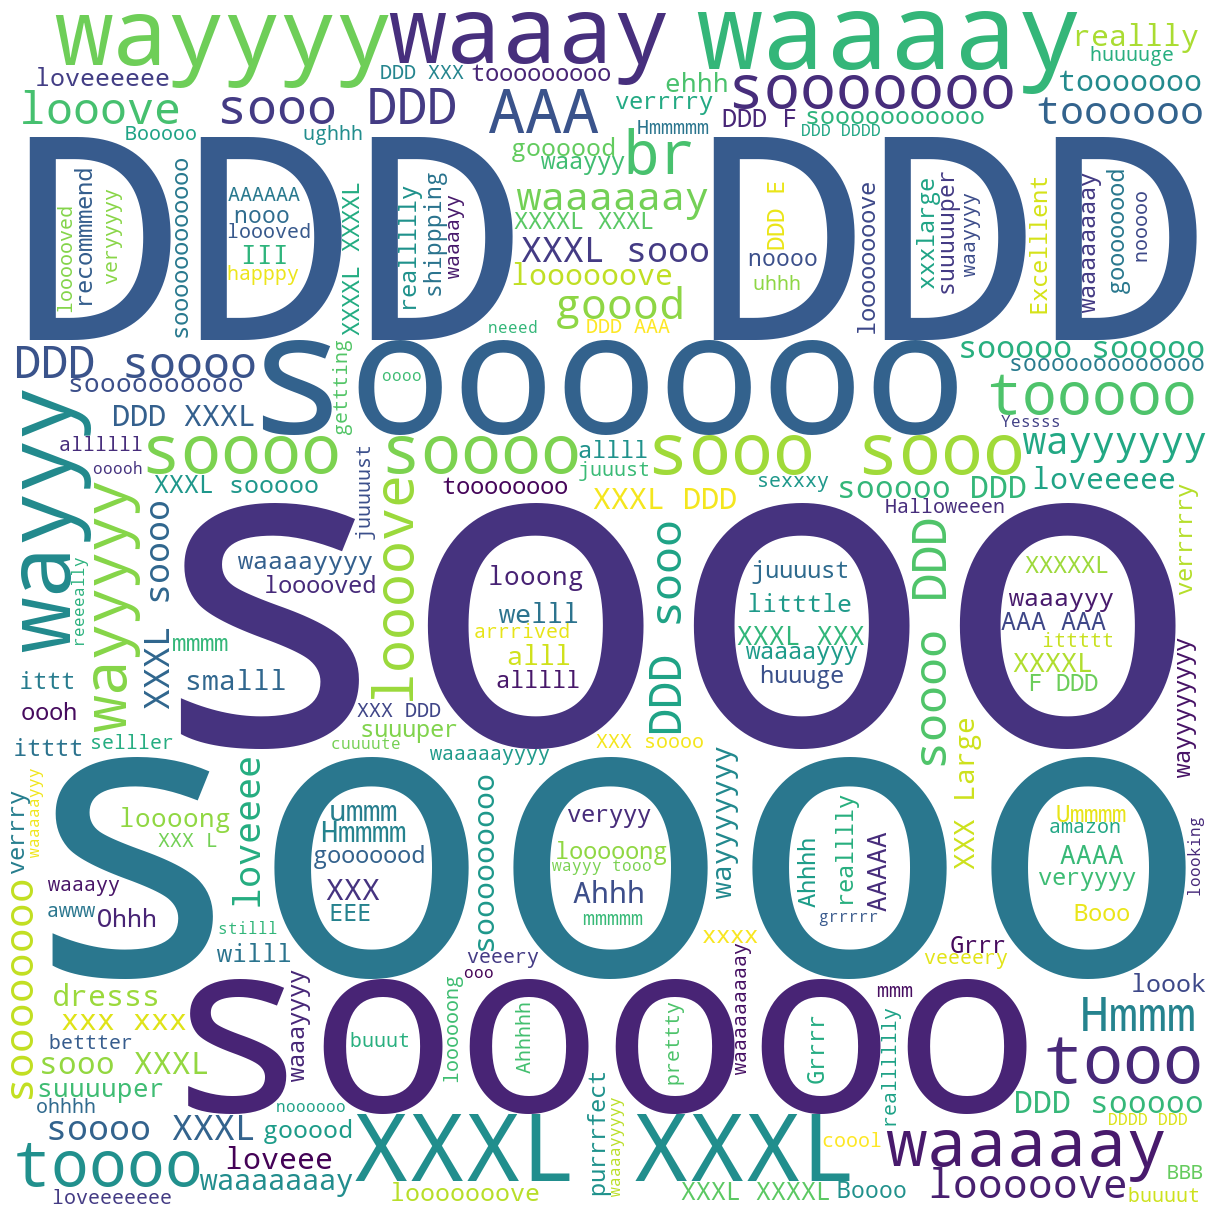

In [55]:
show_word_cloud(df, 'review_body')

In [59]:
counts_dict = df['product_id'].value_counts().to_dict()
# Sort the dictionary in descending order by count
uniques_and_counts = dict(sorted(counts_dict.items(), key=lambda x: x[1], reverse=True))
uniques_and_counts = dict(list(uniques_and_counts.items())[:15])
uniques_and_counts

{'B002HJ377A': 71,
 'B000NZW3IY': 59,
 'B00CONNGVQ': 39,
 'B00CONNDGO': 34,
 'B00CONNILE': 32,
 'B00JTYYLJO': 32,
 'B00ECIYWA0': 22,
 'B00L8WBEMW': 19,
 'B00ESMSCWO': 19,
 'B00KJIVDW2': 18,
 'B00LLIVQM6': 18,
 'B00GBT8QM8': 17,
 'B00F9RJLTU': 17,
 'B00JUW0IM4': 17,
 'B00K2QLZMO': 16}

In [61]:
result = pd.DataFrame()

for value in uniques_and_counts.keys():
    filtered = df[df['product_id'] == value].head(16)
    result = pd.concat([result, filtered])

result.to_csv("amazon_apparel_reviews_emoji_and_emphasized_text_top_15.csv")

In [7]:
# get all review_body for a given product_id
def get_reviews_for_product_id(product_id):
    return df[df['product_id'] == product_id]['review_body'].tolist()

get_reviews_for_product_id('B002HJ377A')

['How do I even begin to express how awesome and mantastic this shirt is. My Name is Billy Ray Cletus Joseph Noah Jonsey Moses III and I am a sultry 5\\\\"9 weighing in at an luscious 441 lbs and nothing gets the ladies going more than this amazing shirt. Since I received the shirt whenever I pull up to the Cowboy Cantina in my 1991 F-150 wearing this bad boy the magic begins. once these young females see me in my wolf shirt they already know that I am a beast, and that I will pleasure them like a beast dose, as soon as I am done eating my chili cheese nachos, chili cheese fries, chili cheese hot dog and finally my chili cheese cheesecake, I choose one lucky lady to take back to my estate at running mountain trailer park, after an amazing night, I make her get me a beer then kick her out. Then it\'s back to work as a union rep fighting for terminated employees \\\\"They Turk Err Jobs\\\\" is our motto, and after work its back to the Cowboy Cantina.',
 'This shirt has changed my life!  

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()

# from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# get sentiments for each review and make a list of dictionaries with review and sentiment scores
def get_sentiments_for_product_id(product_id):
    sentiments = []
    for review in get_reviews_for_product_id(product_id):
        sentiments.append({'review': review, 'sentiment': sia.polarity_scores(review)})
    return sentiments



get_sentiments_for_product_id('B002HJ377A')
# sia.polarity_scores(row['review_body'])['pos']

[{'review': 'How do I even begin to express how awesome and mantastic this shirt is. My Name is Billy Ray Cletus Joseph Noah Jonsey Moses III and I am a sultry 5\\\\"9 weighing in at an luscious 441 lbs and nothing gets the ladies going more than this amazing shirt. Since I received the shirt whenever I pull up to the Cowboy Cantina in my 1991 F-150 wearing this bad boy the magic begins. once these young females see me in my wolf shirt they already know that I am a beast, and that I will pleasure them like a beast dose, as soon as I am done eating my chili cheese nachos, chili cheese fries, chili cheese hot dog and finally my chili cheese cheesecake, I choose one lucky lady to take back to my estate at running mountain trailer park, after an amazing night, I make her get me a beer then kick her out. Then it\'s back to work as a union rep fighting for terminated employees \\\\"They Turk Err Jobs\\\\" is our motto, and after work its back to the Cowboy Cantina.',
  'sentiment': {'neg': 0

In [25]:
# sia.polarity_scores("hell no ")
import emoji
import re
# correct words with repeating letters in a given text while also not removing emojis
def correct_repeating_letters(text):
    if not isinstance(text, str):
        return text
    no_emojis = emoji.replace_emoji(text)
    filtered_sentence = re.sub(r'\d+', '', no_emojis)
    words = filtered_sentence.split()
    for word in words:
        if re.match(r'\b\w*(\w)\1{2,}\w*\b', word):
            # if re.search(r'(\w)\1{2,}', word):
            # print(word)
            # print(re.sub(r'(\w)\1{2,}', r'\1\1', word))
            filtered_sentence = filtered_sentence.replace(word, re.sub(r'(\w)\1{2,}', r'\1\1', word))
    return filtered_sentence






# def correct_repeating_letters(text):
#     if not isinstance(text, str):
#         return text
#     no_emojis = emoji.replace_emoji(text)
#     filtered_sentence = re.sub(r'\d+', '', no_emojis)
#     words = filtered_sentence.split()
#     for word in words:
#         if re.match(r'\b\w*(\w)\1{2,}\w*\b', word):
#             # if re.search(r'(\w)\1{2,}', word):
#             # print(word)
#             # print(re.sub(r'(\w)\1{2,}', r'\1\1', word))
#             filtered_sentence = filtered_sentence.replace(word, re.sub(r'(\w)\1{2,}', r'\1\1', word))
#     return filtered_sentence

correct_repeating_letters("Helllooo i love youu😂😁")
emoji.emojize("Helllooo i love youu😂😁")
# emoji.
# extract emojis from text
def extract_emojis(text):
    if not isinstance(text, str):
        return text
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

extract_emojis("Helllooo i love youu😂😁")

# preprocess text for sentiment analysis with all steps such as lemmatization stop words removal etc....
def preprocess_text(text):
    if not isinstance(text, str):
        return text
    # remove emojis
    no_emojis = emoji.replace_emoji(text)
    # remove numbers
    filtered_sentence = re.sub(r'\d+', '', no_emojis)
    # remove punctuations
    filtered_sentence = re.sub(r'[^\w\s]', '', filtered_sentence)
    # remove stop words
    filtered_sentence = ' '.join([w for w in filtered_sentence.split() if not w in stop_words])
    # lemmatize
    filtered_sentence = ' '.join([lemmatizer.lemmatize(w) for w in filtered_sentence.split()])
    return filtered_sentence



'😂😁'

In [ ]:
import pandas as pd
import numpy as np


sentiments = {}
df
for index, row in df.iterrows():
    # print(sentiments)
    if row['product_id'] in unique_ids:
        if(row['product_id'] in sentiments):
            if 'emoji' in sentiments[row['product_id']]:
                # print(sentiments[row['product_id']]['emoji'].append(1000))
                # sentiments[row['product_id']]['emoji'] =
                sentiments[row['product_id']]['emoji'].append(sia.polarity_scores(row['review_body'])['pos'])
                # print(sentiments[row['product_id']]['emoji'])
            else:
                sentiments[row['product_id']]['emoji'] = [sia.polarity_scores(row['review_body'])['pos']]
                # sentiments[row['product_id']] = sentiments[row['product_id']] + sia.polarity_scores(row['review_body'])['pos']
        else:
            sentiments[row['product_id']] = {'emoji' : [sia.polarity_scores(row['review_body'])['pos']]}

# sentiments

for key, value in sentiments.items():
    # total = sum(value['emoji'])
    # print(f"Total for {key}: {total}")
    mean = np.mean(value['emoji'])
    sentiments[key] = mean
    # print(f"Mean for {key}: {mean}")
dict(sorted(sentiments.items(), key=lambda item: item[1]))

In [28]:
import re

def remove_numerical_text(text):
    return re.sub(r'\d+', '', text)

remove_numerical_text("dsgsidgfi Hellooooo 1214e24")

# POS tagging for a given text
def get_pos_tags(text):
    if not isinstance(text, str):
        return text
    return nltk.pos_tag(nltk.word_tokenize(text))



'dsgsidgfi Hellooooo e'

In [52]:
# check if sentence has words with repeating letters such as "gooooood". also match special characters such as "sh****t"

import re
pattern = r'.*(.).*\1.*'
# r'\b\w*(\w)\1{2,}\w*\b'

def has_repeating_letters(text):
    if not isinstance(text, str):
        return text
    words = text.split()
    for word in words:
        if re.match(pattern, word):
            print(word)
    return False

has_repeating_letters("shiiit")

# remove punctuations from a given text. but keep text with special characters within them such as sh****t
def remove_punctuations(text):
    if not isinstance(text, str):
        return text
    return re.sub(r'[^\w\s]', '', text)
remove_punctuations("shi***iit")

emoji.replace_emoji("Helllooo i love youu😂😁")

shiiit


'Helllooo i love youu'

In [1]:
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer as Text_SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as Emoji_SIA
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

tokens = word_tokenize("I love it man")

stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]

lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token) for token in tokens]

" ".join(tokens)

'I love man'

In [ ]:
# get top 10 rows for a givent product_id
def get_top_10_rows(product_id):
    return df[df['product_id'] == product_id].head(10)

CSV
